<a href="https://colab.research.google.com/github/KoMurase/movie_research_2/blob/master/reviews_data_vis_prepro2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#すたあと

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp -r '/content/drive/MyDrive/Movies/data/mojo_japan/' '/content/'

#!cp -r '/content/drive/MyDrive/Movies/data/metadata_filmarks/' '/content/'

!cp -r '/content/drive/MyDrive/Movies/data/filmarks_review' '/content/'

In [ ]:
#!sudo apt install fonts-noto-cjk
#!unzip '/content/NotoSansCJKjp-hinted.zip'

In [ ]:
!pip install japanize-matplotlib
!apt-get -q -y install swig 
!apt-get install mecab
!apt-get install libmecab-dev
!apt-get install mecab-ipadic-utf8
!pip install mecab-python3
!pip install unidic-lite
#日本語フォントのインストール　（wordcloudなどで可視化するため）
!apt-get -y install fonts-ipafont-gothic

!pip install neologdn 
#半角を全角に変換
!pip install mojimoji

Reading package lists...
Building dependency tree...
Reading state information...
swig is already the newest version (3.0.12-1).
0 upgraded, 0 newly installed, 0 to remove and 12 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
mecab is already the newest version (0.996-5).
0 upgraded, 0 newly installed, 0 to remove and 12 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libmecab-dev is already the newest version (0.996-5).
0 upgraded, 0 newly installed, 0 to remove and 12 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
mecab-ipadic-utf8 is already the newest version (2.7.0-20070801+main-1).
0 upgraded, 0 newly installed, 0 to remove and 12 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-ipafont-gothic is already the newest version (00303

In [ ]:
import pandas as pd
import codecs 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import japanize_matplotlib

import warnings

import os
import gc
from tqdm import tqdm

RANDOM_SEED=2020

import warnings
warnings.simplefilter("ignore")

#でえた　よみこみ

In [ ]:
def read_data(dir, encode_type):
  output=pd.DataFrame()
  print(dir)
  files=os.listdir(dir)
  print(files)

  for file_ in files:
    if '2016' or '2017' or '2018' or '2019' in file_: #収集できているファイル


      path = dir+file_
      print(path)
      with codecs.open(path, "r", encode_type, "ignore") as file:
          d = pd.read_csv(file, delimiter=",")
      
      output = pd.concat([output, d], axis=0)

  return output

In [ ]:
reviews_dir = '/content/filmarks_review/'

In [ ]:
data = read_data(reviews_dir, encode_type='utf-8')

/content/filmarks_review/
['2017.csv', '2019.csv', '2016.csv', '2018.csv']
/content/filmarks_review/2017.csv
/content/filmarks_review/2019.csv
/content/filmarks_review/2016.csv
/content/filmarks_review/2018.csv


In [ ]:
mojo_dir='/content/mojo_japan/'

meta_d = read_data(mojo_dir, encode_type='utf-8')

/content/mojo_japan/
['data_2017.csv', 'data_2016.csv', 'data_2018.csv', 'data_2019.csv']
/content/mojo_japan/data_2017.csv
/content/mojo_japan/data_2016.csv
/content/mojo_japan/data_2018.csv
/content/mojo_japan/data_2019.csv


In [ ]:
meta_d

,Rank,Title,Title(ja),Theaters,Release Date,Distributor,Gross,Total Gross,url,age,Filmarks URL
0,1,Beauty and the Beast,Ɩb,773,Walt Disney Pictures\n\n,Walt Disney Pictures\n\n,"$107,918,441","$110,790,534",https://www.boxofficemojo.com/year/2017/?area=...,2017.0,https://filmarks.com/movies/61335
1,2,Despicable Me 3,O[̃~jI@ꔭ,375,Toho-Towa\n\n,Toho-Towa\n\n,"$64,950,363","$66,229,119",https://www.boxofficemojo.com/year/2017/?area=...,2017.0,https://filmarks.com/movies/71583
2,3,Pirates of the Caribbean: Dead Men Tell No Tales,pC[cEIuEJrA/Ō̊C,-,Walt Disney Pictures\n\n,Walt Disney Pictures\n\n,"$59,765,357","$59,765,357",https://www.boxofficemojo.com/year/2017/?area=...,2017.0,https://filmarks.com/movies/56771
3,4,Your Name.,N̖,301,Toho\n\n,Toho\n\n,"$49,762,752","$233,794,134",https://www.boxofficemojo.com/year/2017/?area=...,2017.0,https://filmarks.com/movies/65931
4,5,Moana,AiƓ`̊C,568,Walt Disney Pictures\n\n,Walt Disney Pictures\n\n,"$44,819,180","$45,915,441",https://www.boxofficemojo.com/year/2017/?area=...,2017.0,https://filmarks.com/movies/60104
...,...,...,...,...,...,...,...,...,...,...,...
172,173,"Paul, Apostle of Christ",pE Ǝ͂̕,9,Sony Pictures Releasing\n\n,Sony Pictures Releasing\n\n,"$16,777","$280,945",https://www.boxofficemojo.com/year/2019/?area=...,2019.0,https://filmarks.com/movies/79091
173,174,Human Flow,q[}Et[ nY,2,Kino Films\n\n,Kino Films\n\n,"$8,888","$8,888",https://www.boxofficemojo.com/year/2019/?area=...,2019.0,https://filmarks.com/movies/75806
174,175,Searching,search^T[`,62,Sony Pictures Releasing\n\n,Sony Pictures Releasing\n\n,"$4,387","$1,861,498",https://www.boxofficemojo.com/year/2019/?area=...,2019.0,https://filmarks.com/movies/79670
175,176,Christopher Robin,v[ƑlɂȂl,-,Walt Disney Pictures\n\n,Walt Disney Pictures\n\n,"$1,695","$21,496,669",https://www.boxofficemojo.com/year/2019/?area=...,2019.0,https://filmarks.com/movies/77270


In [ ]:
meta_d = meta_d[['Title','Title(ja)','Filmarks URL']]
meta_d = meta_d.rename(columns={'Filmarks URL':'title_url'})

In [ ]:
meta_d

,Title,Title(ja),title_url
0,Beauty and the Beast,Ɩb,https://filmarks.com/movies/61335
1,Despicable Me 3,O[̃~jI@ꔭ,https://filmarks.com/movies/71583
2,Pirates of the Caribbean: Dead Men Tell No Tales,pC[cEIuEJrA/Ō̊C,https://filmarks.com/movies/56771
3,Your Name.,N̖,https://filmarks.com/movies/65931
4,Moana,AiƓ`̊C,https://filmarks.com/movies/60104
...,...,...,...
172,"Paul, Apostle of Christ",pE Ǝ͂̕,https://filmarks.com/movies/79091
173,Human Flow,q[}Et[ nY,https://filmarks.com/movies/75806
174,Searching,search^T[`,https://filmarks.com/movies/79670
175,Christopher Robin,v[ƑlɂȂl,https://filmarks.com/movies/77270


In [ ]:
data[data['title']=='|']

,title,name,time,review,score,URL
90858,|,tukukakeの感想・評価,2020/12/13 21:19,シリーズ最終作MVPは塩見さん！演技見た目役回りどれも重要。本作はピエールなきにしては語られ...,3.8,https://filmarks.com/movies/71282?page=1
90859,|,ハルハラヒラヒロの感想・評価,2020/12/12 00:23,初代、ビヨンドと比べ迫力が落ちたなぁと感じましたが、多分みんなビヨンドまでで死んじゃったから...,3.0,https://filmarks.com/movies/71282?page=1
90860,|,MRFOXの感想・評価,2020/12/11 01:55,なんか登場人物が電話ばっかしている。極道やったらどつき合わんかい！組員皆殺しにしても捕まらな...,2.0,https://filmarks.com/movies/71282?page=1
90861,|,PPPの感想・評価,2020/12/09 17:59,前作から間が開きすぎたので、ストーリーを思い出しながら観ていく感じだったが、それぞれ演技に迫...,3.5,https://filmarks.com/movies/71282?page=1
90862,|,西郷どんの感想・評価,2020/12/05 16:20,やっぱり2回目観るとよくわかるね。やっぱり何より残念なのは、2と3の間が開きすぎて、西田さん...,3.5,https://filmarks.com/movies/71282?page=1
...,...,...,...,...,...,...
347090,|,らっきょうの感想・評価,2018/11/28 21:20,千石撫子に笑った。鏡の反射は80パーセントくらい。鏡像は現像よりもぼやけて見える。,3.0,https://filmarks.com/movies/80184?page=9
347091,|,イベリー小豚の感想・評価,2018/11/28 00:32,タイトル通り、終わりの続き。化物語、傷物語の2シリーズしか観てない……そんな私にはやはりまだ...,3.3,https://filmarks.com/movies/80184?page=9
347092,|,Wの感想・評価,2018/11/27 01:22,内容としては、色々はっちゃけてた感じがあり、よかったと思います。 ラストが少ししんみりするの...,3.5,https://filmarks.com/movies/80184?page=9
347093,|,はまるの感想・評価,2018/11/26 22:28,予備知識なしはキツいいいい 偽物語以来の物語シリーズでした いつもの神原がみたかった,2.8,https://filmarks.com/movies/80184?page=9


タイトルが取得できていないデータが多いが，URLがタイトルを示しているため大丈夫

In [ ]:
data['title_url'] = data['URL'].apply(lambda x: x.split('?')[0])

In [ ]:
data['title_url'].value_counts()

https://filmarks.com/movies/63840    21340
https://filmarks.com/movies/62746    20970
https://filmarks.com/movies/61311    19147
https://filmarks.com/movies/66158    16183
https://filmarks.com/movies/62932    14898
                                     ...  
https://filmarks.com/movies/67452       38
https://filmarks.com/movies/64999       36
https://filmarks.com/movies/66548       36
https://filmarks.com/movies/76582       35
https://filmarks.com/movies/67119        8
Name: title_url, Length: 669, dtype: int64

集め方を変えたため，1000以上のものは工夫したい

In [ ]:
#各タイトルのレビューがいくつ取れたかをカウントする

vc = data['title_url'].value_counts()
data['counts'] = data['title_url'].map(vc)

In [ ]:
data1 = data[data['counts']>100].reset_index(drop=True)
data2 = data[data['counts']<=100].reset_index(drop=True)

In [ ]:
title_urls = data1['title_url'].unique()
len(title_urls )

640

In [ ]:
data_new = pd.DataFrame()

for title_url in title_urls:
  df = data1[data1['title_url']==title_url].sample(100,random_state=RANDOM_SEED)
  data_new = pd.concat([data_new, df], axis=0)

In [ ]:
del data ,title_urls

data = pd.concat([data_new, data2], axis=0)

del data_new, data2

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 <a list of 42 Text major ticklabel objects>)

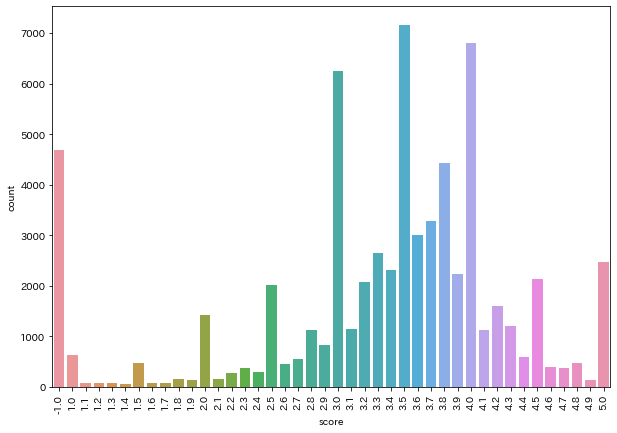

In [ ]:
plt.figure(figsize=(10, 7))
sns.countplot(data['score'].apply(lambda x: x.replace('-', '-1'))
                                             .astype(float)
                                             .sort_values(ascending=True))
plt.xticks(rotation=90)

0.5刻みで点数をつけるのが人間の癖なのか？？

In [ ]:
data['score'] = data['score'].apply(lambda x: x.replace('-', '-1')).astype(float)

In [ ]:
data.loc[data['score']!=-1, 'score'].describe()

count    61232.000000
mean         3.513839
std          0.745371
min          1.000000
25%          3.000000
50%          3.500000
75%          4.000000
max          5.000000
Name: score, dtype: float64

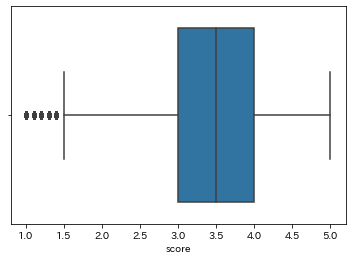

In [ ]:
sns.boxplot(data.loc[data['score']!=-1, 'score'])

～25%,25～50% ,50～75%,75%～というようなデータセットを作る

In [ ]:
#点数がついていないデータは考えない
df = data[data['score']!=-1]
df_ns = data[data['score']==-1]

In [ ]:
"""cls_25 = df[df['score']<=3.1]
cls_25_50 = df[(df['score']>3.1) & (df['score']<=3.6)]
cls_50_75 = df[(df['score']>3.6) & (df['score']<=4.0)]
cls_75 = df[df['score']>4.0]"""

"cls_25 = df[df['score']<=3.1]\ncls_25_50 = df[(df['score']>3.1) & (df['score']<=3.6)]\ncls_50_75 = df[(df['score']>3.6) & (df['score']<=4.0)]\ncls_75 = df[df['score']>4.0]"

#もくひよう : ひんしゆつ たんご を あつめましよう

#まえしより

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download("stopwords")
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from wordcloud import STOPWORDS, WordCloud


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
!pip install emoji 
!pip install nagisa 
#!pip install unicodedata 

import emoji
import nagisa

def delete_emoji(text):
  target_list = [w for w in text if w in emoji.UNICODE_EMOJI]
  for trg in target_list:
    text = text.replace(trg, "")
  return text

In [ ]:
import neologdn 
import string 
import mojimoji 
import re 

def text_cleaning(text):

  text = neologdn.normalize(text)
  #URLを除去する
  text = re.sub(
      r'(http|https)://([-\w]+\.)+[-\w]+(/[-\w./?%&=]*)?', 
      "",
      text)
  #全角から半角に
  text = mojimoji.zen_to_han(text) 

  #3D,2Dを残したい
  text = text.replace('3D','三次元')
  text = text.replace('2D','二次元')

  #数字をすべて0に置換 
  text = re.sub(r'\d+', '0', text)
  text = re.sub(r'\d{1,10}', '0', text) #1回以上繰り返す文字列 \d{1,} 
                                        #2回以内繰り返す文字列 \d{,2} 
  text = re.sub(r'0+', '0', text)
  #string.punctuationの除去
  table = str.maketrans('', '', string.punctuation)
  text = text.translate(table) 

  text = text.replace("｡",'').replace("。",'').replace("，",'')\
             .replace(",",'').replace("、",'').replace("､",'')\
             .replace("…",'').replace("･",'')

  # 【】の除去
  text = re.sub(r'[【】]', '', text)
  # （）の除去
  text = re.sub(r'[（）()]', '', text)
  # ［］の除去
  text = re.sub(r'[［］\[\]]', '', text)
  #アルファベットをの大文字を小文字に変換
  text = text.lower()
  #改行コードの除去
  text = text.replace('\n', '')
  text = text.replace('\r\n','')
  #空白を除去
  #全角スペース
  text = text.replace('\u3000','')
  #タブキー
  text = text.replace('\t','')
  #半角
  #text = re.sub(r' ','', text) →英字幕などの指摘もあるため後で行う
  
  return text

In [ ]:
import MeCab
def mecab_dokuritugo(text):
  tagger = MeCab.Tagger() 
  tagger.parse('')
  node = tagger.parseToNode(text) 
  dousi_list = []
  keiyousi_list = []
  meisi_list = [] 

  while node: 
    pos = node.feature.split(",")[0] ### 単語の品詞を抽出
    if pos in ["動詞"]:
      ### 動詞,形容詞の原型を抽出 
      ### [6]は原型がカタカナになって返ってくる
      word = node.feature.split(",")[7]  
      dousi_list.append(word) 

    elif pos in ["形容詞"]:
      ### 動詞,形容詞の原型を抽出 
      ### [6]は原型がカタカナになって返ってくる
      word = node.feature.split(",")[7]  
      keiyousi_list.append(word)

    elif pos in ["名詞"]: ### 名詞はそのまま
      word = node.surface 
      meisi_list.append(word)
    node = node.next
  return pd.Series([" ".join(dousi_list), 
                    " ".join(keiyousi_list), 
                    " ".join(meisi_list) ])


"""
def return_doushi(text):
  tagger = MeCab.Tagger() 
  tagger.parse('')
  node = tagger.parseToNode(text) 
  word_list = [] 
  while node: 
    pos = node.feature.split(",")[0] ### 単語の品詞を抽出
    if pos in ["動詞"]: #"形容詞"]:
      ### 動詞,形容詞の原型を抽出 
      ### [6]は原型がカタカナになって返ってくる
      word = node.feature.split(",")[7]  
      word_list.append(word) 
  return " ".join(word_list)

def return_keiyoushi(text):
  tagger = MeCab.Tagger() 
  tagger.parse('')
  node = tagger.parseToNode(text) 
  word_list = [] 
  while node: 
    pos = node.feature.split(",")[0] ### 単語の品詞を抽出
    if pos in ["形容詞"]:
      ### 動詞,形容詞の原型を抽出 
      ### [6]は原型がカタカナになって返ってくる
      word = node.feature.split(",")[7]  
      word_list.append(word) 
  return " ".join(word_list)

def return_meishi(text):
  tagger = MeCab.Tagger() 
  tagger.parse('')
  node = tagger.parseToNode(text) 
  word_list = [] 
  while node: 
    pos = node.feature.split(",")[0] ### 単語の品詞を抽出
    if pos in ["名詞"]: ### 名詞はそのまま
      word = node.surface 
      word_list.append(word)
    node = node.next 
  return " ".join(word_list)

"""

'\ndef return_doushi(text):\n  tagger = MeCab.Tagger() \n  tagger.parse(\'\')\n  node = tagger.parseToNode(text) \n  word_list = [] \n  while node: \n    pos = node.feature.split(",")[0] ### 単語の品詞を抽出\n    if pos in ["動詞"]: #"形容詞"]:\n      ### 動詞,形容詞の原型を抽出 \n      ### [6]は原型がカタカナになって返ってくる\n      word = node.feature.split(",")[7]  \n      word_list.append(word) \n  return " ".join(word_list)\n\ndef return_keiyoushi(text):\n  tagger = MeCab.Tagger() \n  tagger.parse(\'\')\n  node = tagger.parseToNode(text) \n  word_list = [] \n  while node: \n    pos = node.feature.split(",")[0] ### 単語の品詞を抽出\n    if pos in ["形容詞"]:\n      ### 動詞,形容詞の原型を抽出 \n      ### [6]は原型がカタカナになって返ってくる\n      word = node.feature.split(",")[7]  \n      word_list.append(word) \n  return " ".join(word_list)\n\ndef return_meishi(text):\n  tagger = MeCab.Tagger() \n  tagger.parse(\'\')\n  node = tagger.parseToNode(text) \n  word_list = [] \n  while node: \n    pos = node.feature.split(",")[0] ### 単語の品詞を抽出\n    if pos in ["名詞

In [ ]:
def text_prepro(input_df:pd.DataFrame):
  output_df = input_df.copy()
  output_df["review"] = input_df['review'].apply(text_cleaning)
  #output_df["review_tokenize"] = output_df["review"].apply(mecab_dokuritugo)
  output_df[["dousi","keiyousi","meisi"]] = output_df["review"].apply(mecab_dokuritugo)
                                          

  """
  #動詞
  print('動詞抽出中...')
  output_df["doushi"] = output_df["review"].dropna().apply(return_doushi)
  #名詞
  print('名詞抽出中...')
  output_df["meishi"] = output_df["review"].dropna().apply(return_meishi)
  #形容詞
  print('形容詞抽出中...')
  output_df["keiyoushi"] = output_df["review"].dropna().apply(return_keiyoushi)
  """

  return output_df

In [ ]:
df_ = text_prepro(df)
df_

,title,name,time,review,score,URL,title_url,counts,dousi,keiyousi,meisi
1871,22年目の告白 私が殺人犯です|,BOSSblackの感想・評価,2019/05/02 21:09,凄く良くできたｽﾄｰﾘｰ0連休の後半何か観るものを探しているのならｵｽｽﾒしますきちんとした邦画,3.5,https://filmarks.com/movies/69103?page=268,https://filmarks.com/movies/69103,3660,出来る 見る 探す 居る 為る 為る,凄い 良い,ｽﾄｰﾘｰ 0 連休 後半 もの ｵｽｽﾒ 邦画
2891,22年目の告白 私が殺人犯です|,ryoryosanの感想・評価,2020/10/17 17:32,うｰんいろいろ演出の粗が目立って乗れない駆け出しの記者時代にした殺人の死体遺棄を有名になって...,3.0,https://filmarks.com/movies/69103?page=36,https://filmarks.com/movies/69103,3660,目立つ 乗る 為る 成る 為る 埋める 黙す 締める 構える,,ｰ 演出 粗 駆け出し 記者 時代 殺人 死体 遺棄 購入 別荘 首 間 拳銃 ﾏﾇｹ
2104,22年目の告白 私が殺人犯です|,ひーすの感想・評価,2019/04/17 06:47,ﾎﾃﾙでｽﾃｰｷ食べてるあたりからおやおやって思い始めるそこまでがﾋﾟｰｸだった,2.7,https://filmarks.com/movies/69103?page=289,https://filmarks.com/movies/69103,3660,食べる 思う 始める,,ﾎﾃﾙ ｽﾃｰｷ あたり やおや ﾋﾟｰｸ
863,22年目の告白 私が殺人犯です|,Rinkoの感想・評価,2019/09/16 22:25,全ての国民が騙される韓国｢殺人の告白｣ﾘﾒｲｸ版終始ﾃﾝﾎﾟありｽﾘﾙありっ緊張感が続く中の...,3.5,https://filmarks.com/movies/69103?page=177,https://filmarks.com/movies/69103,3660,騙す 続く 見る 見る 見る,無い 面白い,全て 国民 韓国 殺人 告白 ﾘﾒｲｸ 版 ﾃﾝﾎﾟ あり ｽﾘﾙ あり 緊張 感 中 どん...
1287,22年目の告白 私が殺人犯です|,マッサージ屋２号店の感想・評価,2019/06/26 23:03,『殺人の告白』ﾘﾒｲｸ作品そのｵﾘｼﾞﾅﾙ版は鑑賞済みなのですが詳細は忘れてました笑一筋縄で...,4.0,https://filmarks.com/movies/69103?page=214,https://filmarks.com/movies/69103,3660,忘れる 行く 為る 驚く 仕舞う 迎える 言う 為る 言う 有る 得る 為る 見る 為る 有...,面白い 面白い,殺人 告白 ﾘﾒｲｸ 作品 ｵﾘｼﾞﾅﾙ 版 鑑賞 詳細 笑 一筋 縄 ｵﾁ 記憶 どんでん...
...,...,...,...,...,...,...,...,...,...,...,...
1918,魔法少女リリカルなのは Detonation|,よっちゃんの感想・評価,2018/10/19 21:21,期待以上の出来回想ｼｰﾝだけは退屈00 0回目新宿ﾋﾟｶﾃﾞﾘｰ,4.0,https://filmarks.com/movies/75398?page=9,https://filmarks.com/movies/75398,89,,,期待 以上 出来 回想 ｼｰﾝ 退屈 00 0 回 新宿 ﾋﾟｶﾃﾞﾘｰ
1919,魔法少女リリカルなのは Detonation|,rikuの感想・評価,2018/10/19 17:26,ｽｺｱは続き物の後編ということで当然前作『reflection』を見ていることが前提となるな...,3.7,https://filmarks.com/movies/75398?page=9,https://filmarks.com/movies/75398,89,言う 見る 居る 成る 有る 置く 成る 行く 余す 出来る 言う 生かす 見受ける 入る ...,無い 良い 神々しい,ｽｺｱ 続き物 後編 こと 前作 reflection こと 前提 ｼﾘｰｽﾞ 魔法 少女 ...
1920,魔法少女リリカルなのは Detonation|,すやまの感想・評価,2018/10/19 16:39,なのはｼﾘｰｽﾞの映画として0点満点の出来前だった作画も初っ端から全開でそこからどんどんｷﾞ...,5.0,https://filmarks.com/movies/75398?page=9,https://filmarks.com/movies/75398,89,為る 上げる 来る 為る 為る 居る 成る 出る 来る 突く 降り注ぐ 来る 成る 行く 有...,恐ろしい 新しい えげつない 良い 良い 無い はずい,ｼﾘｰｽﾞ 映画 0 点 満点 出来 前 作画 初っ端 全開 ｷﾞｱ 物語 敵対 ｷｬﾗ 味...
1921,魔法少女リリカルなのは Detonation|,翼の感想・評価,2018/10/19 15:34,公開初日に鑑賞前作のﾗｽﾄﾌｫｰﾐｭﾗなのはとﾕｰﾘの戦闘ｼｰﾝからｽﾀｰﾄ展開的に日常ﾊﾟ...,4.5,https://filmarks.com/movies/75398?page=9,https://filmarks.com/movies/75398,89,思う 居る 有る 癒す 有る 思う 成る 有る 為る 頑張る 落とし込む 言う 有る 出来る...,無い 痛い 多い 厳しい 深い 強い 良い,公開 初日 鑑賞 前作 ﾗｽﾄﾌｫｰﾐｭﾗ ﾕｰﾘ 戦闘 ｼｰﾝ ｽﾀｰﾄ 展開 日常 ﾊﾟ...


In [ ]:
#df_.to_csv('/content/drive/MyDrive/Movies/preprocessed/review_data_2016-19.csv', index=False)

In [ ]:
df.shape

(61232, 8)

In [ ]:
df_['keiyousi']

1871                          凄い 良い
2891                               
2104                               
863                          無い 面白い
1287                        面白い 面白い
                   ...             
1918                               
1919                     無い 良い 神々しい
1920    恐ろしい 新しい えげつない 良い 良い 無い はずい
1921          無い 痛い 多い 厳しい 深い 強い 良い
1922                  少ない 無い 早い 嬉しい
Name: keiyousi, Length: 61232, dtype: object

In [ ]:
word_counter = {}

for cel in df_['keiyousi'].values:
  for word in cel.split(' '):
    word_counter[word] = word_counter.get(word, 0) + 1

#sortedで返ってくるのはリスト型なため辞書型に直す
word_counter_={}
for k, v in sorted(word_counter.items(), key=lambda x: -x[1]):
  word_counter_.update({k:v})

word_counter_.pop('')
word_counter = pd.Series(word_counter_)

In [ ]:
word_counter[word_counter>2]

良い       39590
無い       37782
面白い      13120
凄い        9045
可愛い       6827
         ...  
めんこい         3
夥しい          3
すばしこい        3
手厳しい         3
騒々しい         3
Length: 397, dtype: int64

In [ ]:
word_counter.index.values

array(['良い', '無い', '面白い', '凄い', '可愛い', '欲しい', '多い', '強い', '悪い', '楽しい',
       '素晴らしい', '怖い', '旨い', '美しい', '深い', '高い', '長い', '難しい', '優しい', '嬉しい',
       '辛い', '少ない', '悲しい', '早い', '切ない', '大きい', '新しい', '熱い', '若い', '久しい',
       '懐かしい', '酷い', '重い', '薄い', '弱い', '仕方無い', '小さい', '細かい', '暗い', '軽い',
       '恐ろしい', '短い', '温かい', '近い', '物凄い', '可笑しい', '苦しい', '痛い', '低い', '寂しい',
       'やばい', '明るい', '正しい', '詳しい', '珍しい', '厳しい', '濃い', '古い', 'しんどい',
       '激しい', '惜しい', '青い', '甘い', '恥ずかしい', '可愛らしい', '美味しい', '凄まじい', '幼い',
       '遅い', '羨ましい', '眠い', '心地良い', '赤い', '浅い', '渋い', '黒い', '尊い', '怪しい',
       '遠い', '偉い', '微笑ましい', '悔しい', 'いとおしい', '寒い', '狡い', '広い', '清々しい',
       'でかい', '煩い', '緩い', '薄っぺらい', '臭い', '汚い', '眩しい', '危ない', '生々しい',
       '安っぽい', '白い', '相応しい', '痛々しい', '儚い', '賢い', '呆気ない', '重たい', '力強い',
       'きつい', 'しつこい', '有り難い', '狭い', '忙しい', '太い', 'めでたい', '安い', 'もどかしい',
       '程良い', 'くどい', '目新しい', '固い', '雑い', '愛しい', '潔い', '空しい', 'ややこしい',
       '逞しい', '愛らしい', '厚い', '醜い', '冷たい', '危うい', '細い', '宜しい', 'あざとい',

In [ ]:
def boolean_contains_keyword(input_df:pd.DataFrame)->pd.DataFrame:
  output_df = input_df.copy()
  cols=[]
  for keyword in word_counter.index:
    output_df[f'reviews_contains_{keyword}']=output_df['keiyousi'].dropna().apply(lambda x: 1 if keyword in x else 0)
    cols.append(f'reviews_contains_{keyword}')
  return output_df[cols]

In [ ]:
keiyousi = boolean_contains_keyword(df_)

In [ ]:
result = pd.concat([df_[['score','title_url']], keiyousi], axis=1)
result

,score,title_url,reviews_contains_良い,reviews_contains_無い,reviews_contains_面白い,reviews_contains_凄い,reviews_contains_可愛い,reviews_contains_欲しい,reviews_contains_多い,reviews_contains_強い,reviews_contains_悪い,reviews_contains_楽しい,reviews_contains_素晴らしい,reviews_contains_怖い,reviews_contains_旨い,reviews_contains_美しい,reviews_contains_深い,reviews_contains_高い,reviews_contains_長い,reviews_contains_難しい,reviews_contains_優しい,reviews_contains_嬉しい,reviews_contains_辛い,reviews_contains_少ない,reviews_contains_悲しい,reviews_contains_早い,reviews_contains_切ない,reviews_contains_大きい,reviews_contains_新しい,reviews_contains_熱い,reviews_contains_若い,reviews_contains_久しい,reviews_contains_懐かしい,reviews_contains_酷い,reviews_contains_重い,reviews_contains_薄い,reviews_contains_弱い,reviews_contains_仕方無い,reviews_contains_小さい,reviews_contains_細かい,...,reviews_contains_程近い,reviews_contains_とろい,reviews_contains_目敏い,reviews_contains_青白い,reviews_contains_胸苦しい,reviews_contains_手重い,reviews_contains_目早い,reviews_contains_後ろ暗い,reviews_contains_思わしい,reviews_contains_汚らしい,reviews_contains_とっぽい,reviews_contains_ねつい,reviews_contains_面憎い,reviews_contains_空々しい,reviews_contains_気強い,reviews_contains_嘆かわしい,reviews_contains_肌寒い,reviews_contains_悪賢い,reviews_contains_人臭い,reviews_contains_えらしい,reviews_contains_妬ましい,reviews_contains_木暗い,reviews_contains_人悪い,reviews_contains_か細い,reviews_contains_しおらしい,reviews_contains_派手派手しい,reviews_contains_きな臭い,reviews_contains_はしこい,reviews_contains_せせこましい,reviews_contains_きしょい,reviews_contains_馴れ馴れしい,reviews_contains_青黒い,reviews_contains_疑り深い,reviews_contains_侘しい,reviews_contains_刺々しい,reviews_contains_雪深い,reviews_contains_疚しい,reviews_contains_いみじい,reviews_contains_脂っこい,reviews_contains_美々しい
1871,3.5,https://filmarks.com/movies/69103,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2891,3.0,https://filmarks.com/movies/69103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2104,2.7,https://filmarks.com/movies/69103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
863,3.5,https://filmarks.com/movies/69103,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1287,4.0,https://filmarks.com/movies/69103,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1918,4.0,https://filmarks.com/movies/75398,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1919,3.7,https://filmarks.com/movies/75398,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1920,5.0,https://filmarks.com/movies/75398,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1921,4.5,https://filmarks.com/movies/75398,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
result

,score,title_url,reviews_contains_良い,reviews_contains_無い,reviews_contains_面白い,reviews_contains_凄い,reviews_contains_可愛い,reviews_contains_欲しい,reviews_contains_多い,reviews_contains_強い,reviews_contains_悪い,reviews_contains_楽しい,reviews_contains_素晴らしい,reviews_contains_怖い,reviews_contains_旨い,reviews_contains_美しい,reviews_contains_深い,reviews_contains_高い,reviews_contains_長い,reviews_contains_難しい,reviews_contains_優しい,reviews_contains_嬉しい,reviews_contains_辛い,reviews_contains_少ない,reviews_contains_悲しい,reviews_contains_早い,reviews_contains_切ない,reviews_contains_大きい,reviews_contains_新しい,reviews_contains_熱い,reviews_contains_若い,reviews_contains_久しい,reviews_contains_懐かしい,reviews_contains_酷い,reviews_contains_重い,reviews_contains_薄い,reviews_contains_弱い,reviews_contains_仕方無い,reviews_contains_小さい,reviews_contains_細かい,...,reviews_contains_程近い,reviews_contains_とろい,reviews_contains_目敏い,reviews_contains_青白い,reviews_contains_胸苦しい,reviews_contains_手重い,reviews_contains_目早い,reviews_contains_後ろ暗い,reviews_contains_思わしい,reviews_contains_汚らしい,reviews_contains_とっぽい,reviews_contains_ねつい,reviews_contains_面憎い,reviews_contains_空々しい,reviews_contains_気強い,reviews_contains_嘆かわしい,reviews_contains_肌寒い,reviews_contains_悪賢い,reviews_contains_人臭い,reviews_contains_えらしい,reviews_contains_妬ましい,reviews_contains_木暗い,reviews_contains_人悪い,reviews_contains_か細い,reviews_contains_しおらしい,reviews_contains_派手派手しい,reviews_contains_きな臭い,reviews_contains_はしこい,reviews_contains_せせこましい,reviews_contains_きしょい,reviews_contains_馴れ馴れしい,reviews_contains_青黒い,reviews_contains_疑り深い,reviews_contains_侘しい,reviews_contains_刺々しい,reviews_contains_雪深い,reviews_contains_疚しい,reviews_contains_いみじい,reviews_contains_脂っこい,reviews_contains_美々しい
1871,3.5,https://filmarks.com/movies/69103,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2891,3.0,https://filmarks.com/movies/69103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2104,2.7,https://filmarks.com/movies/69103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
863,3.5,https://filmarks.com/movies/69103,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1287,4.0,https://filmarks.com/movies/69103,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1918,4.0,https://filmarks.com/movies/75398,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1919,3.7,https://filmarks.com/movies/75398,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1920,5.0,https://filmarks.com/movies/75398,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1921,4.5,https://filmarks.com/movies/75398,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
result.to_csv('/content/drive/MyDrive/Movies/preprocessed/keiyousi_2016_2019.csv', index=False)

In [ ]:
result.drop('score', axis=1).groupby('title_url').sum()

,reviews_contains_良い,reviews_contains_無い,reviews_contains_面白い,reviews_contains_凄い,reviews_contains_可愛い,reviews_contains_欲しい,reviews_contains_多い,reviews_contains_強い,reviews_contains_悪い,reviews_contains_楽しい,reviews_contains_素晴らしい,reviews_contains_怖い,reviews_contains_旨い,reviews_contains_美しい,reviews_contains_深い,reviews_contains_高い,reviews_contains_長い,reviews_contains_難しい,reviews_contains_優しい,reviews_contains_嬉しい,reviews_contains_辛い,reviews_contains_少ない,reviews_contains_悲しい,reviews_contains_早い,reviews_contains_切ない,reviews_contains_大きい,reviews_contains_新しい,reviews_contains_熱い,reviews_contains_若い,reviews_contains_久しい,reviews_contains_懐かしい,reviews_contains_酷い,reviews_contains_重い,reviews_contains_薄い,reviews_contains_弱い,reviews_contains_仕方無い,reviews_contains_小さい,reviews_contains_細かい,reviews_contains_暗い,reviews_contains_軽い,...,reviews_contains_程近い,reviews_contains_とろい,reviews_contains_目敏い,reviews_contains_青白い,reviews_contains_胸苦しい,reviews_contains_手重い,reviews_contains_目早い,reviews_contains_後ろ暗い,reviews_contains_思わしい,reviews_contains_汚らしい,reviews_contains_とっぽい,reviews_contains_ねつい,reviews_contains_面憎い,reviews_contains_空々しい,reviews_contains_気強い,reviews_contains_嘆かわしい,reviews_contains_肌寒い,reviews_contains_悪賢い,reviews_contains_人臭い,reviews_contains_えらしい,reviews_contains_妬ましい,reviews_contains_木暗い,reviews_contains_人悪い,reviews_contains_か細い,reviews_contains_しおらしい,reviews_contains_派手派手しい,reviews_contains_きな臭い,reviews_contains_はしこい,reviews_contains_せせこましい,reviews_contains_きしょい,reviews_contains_馴れ馴れしい,reviews_contains_青黒い,reviews_contains_疑り深い,reviews_contains_侘しい,reviews_contains_刺々しい,reviews_contains_雪深い,reviews_contains_疚しい,reviews_contains_いみじい,reviews_contains_脂っこい,reviews_contains_美々しい
title_url,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
https://filmarks.com/movies/18258,40,47,4,12,0,7,7,10,1,0,20,0,5,1,8,5,4,4,0,1,2,3,0,5,0,5,0,6,1,1,0,5,3,0,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
https://filmarks.com/movies/36869,34,20,34,10,10,3,2,3,10,11,1,10,2,1,1,2,1,0,1,2,0,0,0,0,2,0,1,0,1,6,2,1,1,0,0,2,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
https://filmarks.com/movies/41896,44,36,10,7,16,9,12,5,3,6,6,3,8,0,3,3,1,0,0,8,0,3,1,1,0,0,4,5,0,0,2,2,1,0,5,2,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
https://filmarks.com/movies/45085,27,26,10,6,18,5,3,1,9,0,0,1,3,0,0,2,0,1,2,0,1,1,0,4,2,1,0,0,1,2,4,1,0,0,0,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
https://filmarks.com/movies/45089,51,29,17,8,21,6,5,6,5,5,6,2,2,0,0,3,1,0,3,3,2,2,5,1,2,1,2,5,0,12,2,0,1,4,2,0,4,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
https://filmarks.com/movies/84627,45,45,2,7,6,11,11,3,7,2,3,0,1,6,5,1,4,2,1,2,1,4,2,1,3,8,0,1,1,1,0,1,1,2,3,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
https://filmarks.com/movies/85229,61,47,29,16,12,12,3,4,7,7,7,0,4,2,2,1,1,2,2,1,0,2,3,1,0,0,3,1,4,1,1,3,2,3,0,2,0,2,0,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
https://filmarks.com/movies/85256,57,47,32,22,12,11,15,8,6,9,9,4,7,2,6,4,1,4,3,2,1,0,1,5,0,3,2,6,6,2,0,0,0,6,1,2,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_ = result.groupby('title_url').sum()

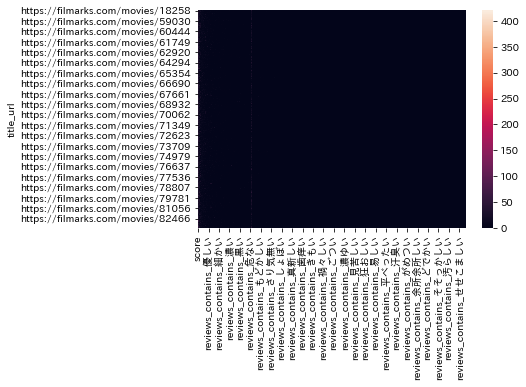

In [ ]:
sns.heatmap(df_)

In [ ]:
g_df = result.drop('score', axis=1).groupby('title_url').mean()
g_df

,reviews_contains_良い,reviews_contains_無い,reviews_contains_面白い,reviews_contains_凄い,reviews_contains_可愛い,reviews_contains_欲しい,reviews_contains_多い,reviews_contains_強い,reviews_contains_悪い,reviews_contains_楽しい,reviews_contains_素晴らしい,reviews_contains_怖い,reviews_contains_旨い,reviews_contains_美しい,reviews_contains_深い,reviews_contains_高い,reviews_contains_長い,reviews_contains_難しい,reviews_contains_優しい,reviews_contains_嬉しい,reviews_contains_辛い,reviews_contains_少ない,reviews_contains_悲しい,reviews_contains_早い,reviews_contains_切ない,reviews_contains_大きい,reviews_contains_新しい,reviews_contains_熱い,reviews_contains_若い,reviews_contains_久しい,reviews_contains_懐かしい,reviews_contains_酷い,reviews_contains_重い,reviews_contains_薄い,reviews_contains_弱い,reviews_contains_仕方無い,reviews_contains_小さい,reviews_contains_細かい,reviews_contains_暗い,reviews_contains_軽い,...,reviews_contains_程近い,reviews_contains_とろい,reviews_contains_目敏い,reviews_contains_青白い,reviews_contains_胸苦しい,reviews_contains_手重い,reviews_contains_目早い,reviews_contains_後ろ暗い,reviews_contains_思わしい,reviews_contains_汚らしい,reviews_contains_とっぽい,reviews_contains_ねつい,reviews_contains_面憎い,reviews_contains_空々しい,reviews_contains_気強い,reviews_contains_嘆かわしい,reviews_contains_肌寒い,reviews_contains_悪賢い,reviews_contains_人臭い,reviews_contains_えらしい,reviews_contains_妬ましい,reviews_contains_木暗い,reviews_contains_人悪い,reviews_contains_か細い,reviews_contains_しおらしい,reviews_contains_派手派手しい,reviews_contains_きな臭い,reviews_contains_はしこい,reviews_contains_せせこましい,reviews_contains_きしょい,reviews_contains_馴れ馴れしい,reviews_contains_青黒い,reviews_contains_疑り深い,reviews_contains_侘しい,reviews_contains_刺々しい,reviews_contains_雪深い,reviews_contains_疚しい,reviews_contains_いみじい,reviews_contains_脂っこい,reviews_contains_美々しい
title_url,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
https://filmarks.com/movies/18258,0.416667,0.489583,0.041667,0.125000,0.000000,0.072917,0.072917,0.104167,0.010417,0.000000,0.208333,0.000000,0.052083,0.010417,0.083333,0.052083,0.041667,0.041667,0.000000,0.010417,0.020833,0.031250,0.000000,0.052083,0.000000,0.052083,0.000000,0.062500,0.010417,0.010417,0.000000,0.052083,0.031250,0.000000,0.010417,0.010417,0.000000,0.000000,0.010417,0.010417,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.010417,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
https://filmarks.com/movies/36869,0.346939,0.204082,0.346939,0.102041,0.102041,0.030612,0.020408,0.030612,0.102041,0.112245,0.010204,0.102041,0.020408,0.010204,0.010204,0.020408,0.010204,0.000000,0.010204,0.020408,0.000000,0.000000,0.000000,0.000000,0.020408,0.000000,0.010204,0.000000,0.010204,0.061224,0.020408,0.010204,0.010204,0.000000,0.000000,0.020408,0.040816,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
https://filmarks.com/movies/41896,0.494382,0.404494,0.112360,0.078652,0.179775,0.101124,0.134831,0.056180,0.033708,0.067416,0.067416,0.033708,0.089888,0.000000,0.033708,0.033708,0.011236,0.000000,0.000000,0.089888,0.000000,0.033708,0.011236,0.011236,0.000000,0.000000,0.044944,0.056180,0.000000,0.000000,0.022472,0.022472,0.011236,0.000000,0.056180,0.022472,0.011236,0.000000,0.011236,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011236,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
https://filmarks.com/movies/45085,0.296703,0.285714,0.109890,0.065934,0.197802,0.054945,0.032967,0.010989,0.098901,0.000000,0.000000,0.010989,0.032967,0.000000,0.000000,0.021978,0.000000,0.010989,0.021978,0.000000,0.010989,0.010989,0.000000,0.043956,0.021978,0.010989,0.000000,0.000000,0.010989,0.021978,0.043956,0.010989,0.000000,0.000000,0.000000,0.010989,0.010989,0.000000,0.010989,0.010989,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0

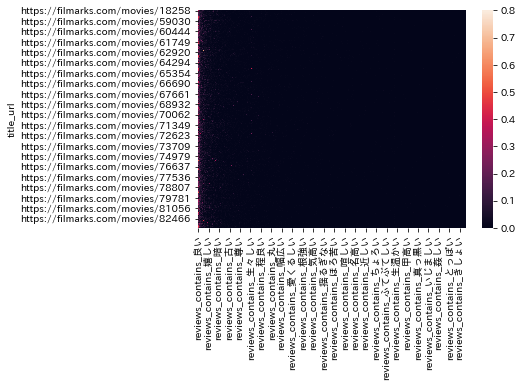

In [ ]:
sns.heatmap(g_df)

In [ ]:
out = result.drop('score', axis=1).groupby('title_url').mean()
out

,reviews_contains_良い,reviews_contains_無い,reviews_contains_面白い,reviews_contains_凄い,reviews_contains_可愛い,reviews_contains_欲しい,reviews_contains_多い,reviews_contains_強い,reviews_contains_悪い,reviews_contains_楽しい,reviews_contains_素晴らしい,reviews_contains_怖い,reviews_contains_旨い,reviews_contains_美しい,reviews_contains_深い,reviews_contains_高い,reviews_contains_長い,reviews_contains_難しい,reviews_contains_優しい,reviews_contains_嬉しい,reviews_contains_辛い,reviews_contains_少ない,reviews_contains_悲しい,reviews_contains_早い,reviews_contains_切ない,reviews_contains_大きい,reviews_contains_新しい,reviews_contains_熱い,reviews_contains_若い,reviews_contains_久しい,reviews_contains_懐かしい,reviews_contains_酷い,reviews_contains_重い,reviews_contains_薄い,reviews_contains_弱い,reviews_contains_仕方無い,reviews_contains_小さい,reviews_contains_細かい,reviews_contains_暗い,reviews_contains_軽い,...,reviews_contains_程近い,reviews_contains_とろい,reviews_contains_目敏い,reviews_contains_青白い,reviews_contains_胸苦しい,reviews_contains_手重い,reviews_contains_目早い,reviews_contains_後ろ暗い,reviews_contains_思わしい,reviews_contains_汚らしい,reviews_contains_とっぽい,reviews_contains_ねつい,reviews_contains_面憎い,reviews_contains_空々しい,reviews_contains_気強い,reviews_contains_嘆かわしい,reviews_contains_肌寒い,reviews_contains_悪賢い,reviews_contains_人臭い,reviews_contains_えらしい,reviews_contains_妬ましい,reviews_contains_木暗い,reviews_contains_人悪い,reviews_contains_か細い,reviews_contains_しおらしい,reviews_contains_派手派手しい,reviews_contains_きな臭い,reviews_contains_はしこい,reviews_contains_せせこましい,reviews_contains_きしょい,reviews_contains_馴れ馴れしい,reviews_contains_青黒い,reviews_contains_疑り深い,reviews_contains_侘しい,reviews_contains_刺々しい,reviews_contains_雪深い,reviews_contains_疚しい,reviews_contains_いみじい,reviews_contains_脂っこい,reviews_contains_美々しい
title_url,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
https://filmarks.com/movies/18258,0.416667,0.489583,0.041667,0.125000,0.000000,0.072917,0.072917,0.104167,0.010417,0.000000,0.208333,0.000000,0.052083,0.010417,0.083333,0.052083,0.041667,0.041667,0.000000,0.010417,0.020833,0.031250,0.000000,0.052083,0.000000,0.052083,0.000000,0.062500,0.010417,0.010417,0.000000,0.052083,0.031250,0.000000,0.010417,0.010417,0.000000,0.000000,0.010417,0.010417,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.010417,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
https://filmarks.com/movies/36869,0.346939,0.204082,0.346939,0.102041,0.102041,0.030612,0.020408,0.030612,0.102041,0.112245,0.010204,0.102041,0.020408,0.010204,0.010204,0.020408,0.010204,0.000000,0.010204,0.020408,0.000000,0.000000,0.000000,0.000000,0.020408,0.000000,0.010204,0.000000,0.010204,0.061224,0.020408,0.010204,0.010204,0.000000,0.000000,0.020408,0.040816,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
https://filmarks.com/movies/41896,0.494382,0.404494,0.112360,0.078652,0.179775,0.101124,0.134831,0.056180,0.033708,0.067416,0.067416,0.033708,0.089888,0.000000,0.033708,0.033708,0.011236,0.000000,0.000000,0.089888,0.000000,0.033708,0.011236,0.011236,0.000000,0.000000,0.044944,0.056180,0.000000,0.000000,0.022472,0.022472,0.011236,0.000000,0.056180,0.022472,0.011236,0.000000,0.011236,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011236,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
https://filmarks.com/movies/45085,0.296703,0.285714,0.109890,0.065934,0.197802,0.054945,0.032967,0.010989,0.098901,0.000000,0.000000,0.010989,0.032967,0.000000,0.000000,0.021978,0.000000,0.010989,0.021978,0.000000,0.010989,0.010989,0.000000,0.043956,0.021978,0.010989,0.000000,0.000000,0.010989,0.021978,0.043956,0.010989,0.000000,0.000000,0.000000,0.010989,0.010989,0.000000,0.010989,0.010989,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0

#各作品を評価するコメントにどのような形容詞がふくまれるのかを集計し，特徴量にする

In [ ]:
meta_d.shape

(719, 3)

In [ ]:
final_result = meta_d.merge(out, how='left', on='title_url')
final_result

,Title,Title(ja),title_url,reviews_contains_良い,reviews_contains_無い,reviews_contains_面白い,reviews_contains_凄い,reviews_contains_可愛い,reviews_contains_欲しい,reviews_contains_多い,reviews_contains_強い,reviews_contains_悪い,reviews_contains_楽しい,reviews_contains_素晴らしい,reviews_contains_怖い,reviews_contains_旨い,reviews_contains_美しい,reviews_contains_深い,reviews_contains_高い,reviews_contains_長い,reviews_contains_難しい,reviews_contains_優しい,reviews_contains_嬉しい,reviews_contains_辛い,reviews_contains_少ない,reviews_contains_悲しい,reviews_contains_早い,reviews_contains_切ない,reviews_contains_大きい,reviews_contains_新しい,reviews_contains_熱い,reviews_contains_若い,reviews_contains_久しい,reviews_contains_懐かしい,reviews_contains_酷い,reviews_contains_重い,reviews_contains_薄い,reviews_contains_弱い,reviews_contains_仕方無い,reviews_contains_小さい,...,reviews_contains_程近い,reviews_contains_とろい,reviews_contains_目敏い,reviews_contains_青白い,reviews_contains_胸苦しい,reviews_contains_手重い,reviews_contains_目早い,reviews_contains_後ろ暗い,reviews_contains_思わしい,reviews_contains_汚らしい,reviews_contains_とっぽい,reviews_contains_ねつい,reviews_contains_面憎い,reviews_contains_空々しい,reviews_contains_気強い,reviews_contains_嘆かわしい,reviews_contains_肌寒い,reviews_contains_悪賢い,reviews_contains_人臭い,reviews_contains_えらしい,reviews_contains_妬ましい,reviews_contains_木暗い,reviews_contains_人悪い,reviews_contains_か細い,reviews_contains_しおらしい,reviews_contains_派手派手しい,reviews_contains_きな臭い,reviews_contains_はしこい,reviews_contains_せせこましい,reviews_contains_きしょい,reviews_contains_馴れ馴れしい,reviews_contains_青黒い,reviews_contains_疑り深い,reviews_contains_侘しい,reviews_contains_刺々しい,reviews_contains_雪深い,reviews_contains_疚しい,reviews_contains_いみじい,reviews_contains_脂っこい,reviews_contains_美々しい
0,Beauty and the Beast,Ɩb,https://filmarks.com/movies/61335,0.437500,0.239583,0.062500,0.093750,0.187500,0.052083,0.031250,0.052083,0.010417,0.072917,0.114583,0.031250,0.052083,0.197917,0.000000,0.020833,0.020833,0.000000,0.010417,0.010417,0.010417,0.000000,0.000000,0.031250,0.010417,0.000000,0.000000,0.000000,0.000000,0.020833,0.010417,0.010417,0.000000,0.000000,0.000000,0.000000,0.020833,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Despicable Me 3,O[̃~jI@ꔭ,https://filmarks.com/movies/71583,0.365591,0.333333,0.215054,0.075269,0.559140,0.064516,0.043011,0.010753,0.021505,0.139785,0.043011,0.000000,0.064516,0.000000,0.021505,0.000000,0.010753,0.000000,0.000000,0.021505,0.000000,0.118280,0.032258,0.000000,0.000000,0.000000,0.000000,0.000000,0.010753,0.000000,0.032258,0.010753,0.000000,0.032258,0.000000,0.021505,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Pirates of the Caribbean: Dead Men Tell No Tales,pC[cEIuEJrA/Ō̊C,https://filmarks.com/movies/56771,0.494737,0.252632,0.242105,0.094737,0.031579,0.094737,0.063158,0.031579,0.021053,0.031579,0.042105,0.042105,0.042105,0.021053,0.021053,0.010526,0.010526,0.000000,0.010526,0.031579,0.000000,0.021053,0.031579,0.010526,0.010526,0.010526,0.010526,0.000000,0.126316,0.021053,0.073684,0.000000,0.000000,0.010526,0.010526,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Your Name.,N̖,https://filmarks.com/movies/65931,0.379310,0.241379,0.252874,0.183908,0.011494,0.045977,0.034483,0.000000,0.034483,0.057471,0.057471,0.000000,0.034483,0.080460,0.045977,0.034483,0.000000,0.034483,0.000000,0.011494,0.000000,0.000000,0.000000,0.011494,0.045977,0.022989,0.022989,0.011494,0.000000,0.022989,0.011494,0.000000,0.000000,0.000000,0.000000,0.011494,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Moana,AiƓ`̊C,https://filmarks.com/movies/60104,0.466667,

In [ ]:
final_result[final_result['Title'].isna()]

,Title,Title(ja),title_url,reviews_contains_良い,reviews_contains_無い,reviews_contains_面白い,reviews_contains_凄い,reviews_contains_可愛い,reviews_contains_欲しい,reviews_contains_多い,reviews_contains_強い,reviews_contains_悪い,reviews_contains_楽しい,reviews_contains_素晴らしい,reviews_contains_怖い,reviews_contains_旨い,reviews_contains_美しい,reviews_contains_深い,reviews_contains_高い,reviews_contains_長い,reviews_contains_難しい,reviews_contains_優しい,reviews_contains_嬉しい,reviews_contains_辛い,reviews_contains_少ない,reviews_contains_悲しい,reviews_contains_早い,reviews_contains_切ない,reviews_contains_大きい,reviews_contains_新しい,reviews_contains_熱い,reviews_contains_若い,reviews_contains_久しい,reviews_contains_懐かしい,reviews_contains_酷い,reviews_contains_重い,reviews_contains_薄い,reviews_contains_弱い,reviews_contains_仕方無い,reviews_contains_小さい,...,reviews_contains_程近い,reviews_contains_とろい,reviews_contains_目敏い,reviews_contains_青白い,reviews_contains_胸苦しい,reviews_contains_手重い,reviews_contains_目早い,reviews_contains_後ろ暗い,reviews_contains_思わしい,reviews_contains_汚らしい,reviews_contains_とっぽい,reviews_contains_ねつい,reviews_contains_面憎い,reviews_contains_空々しい,reviews_contains_気強い,reviews_contains_嘆かわしい,reviews_contains_肌寒い,reviews_contains_悪賢い,reviews_contains_人臭い,reviews_contains_えらしい,reviews_contains_妬ましい,reviews_contains_木暗い,reviews_contains_人悪い,reviews_contains_か細い,reviews_contains_しおらしい,reviews_contains_派手派手しい,reviews_contains_きな臭い,reviews_contains_はしこい,reviews_contains_せせこましい,reviews_contains_きしょい,reviews_contains_馴れ馴れしい,reviews_contains_青黒い,reviews_contains_疑り深い,reviews_contains_侘しい,reviews_contains_刺々しい,reviews_contains_雪深い,reviews_contains_疚しい,reviews_contains_いみじい,reviews_contains_脂っこい,reviews_contains_美々しい


In [ ]:
final_result.to_csv('/content/drive/MyDrive/Movies/preprocessed/keiyousi_2016-2019.csv', index=False)